# Libraries 

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [4]:
from imblearn.combine import SMOTEENN
from tabulate import tabulate 

# Data 

In [5]:
df = pd.read_excel('/kaggle/input/dataset-customer-churn-prediction/customer_churn_large_dataset.xlsx')

In [6]:
df.head(3)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0


### Data Cleaning

In [7]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(100000, 9)

# Analysing Data

In [10]:
df['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

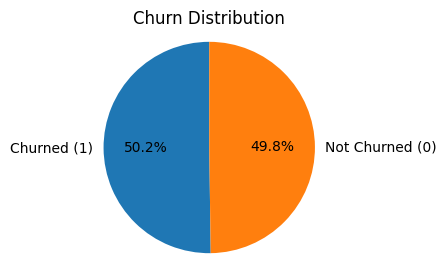

In [11]:
plt.figure(figsize=(3, 3))
plt.pie(
    df['Churn'].value_counts(),
    labels=['Churned (1)', 'Not Churned (0)'], 
    autopct='%1.1f%%', 
    startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  
plt.show()

In [12]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


**Assuming churned(1) and not churned(0).**
#### 75% of customers who are likely to churn: 
- have an age of 57 or younger.
- use less than 387 GB of data.
- have a subscription duration of less than 19 months.
- have a monthly bill less than 82.64 units.







In [13]:
df.drop(
    ['CustomerID', 'Name',],
    axis = 1, 
    inplace = True
)

# Analysing and Visualizing the dataset EDA 

In [14]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean() *100

## Churn Rate by Gender

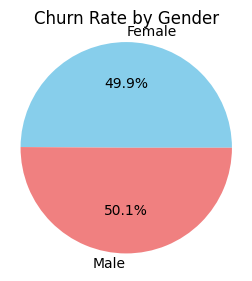

In [15]:
plt.figure(figsize=(3, 3))
plt.pie(gender_churn_rate, labels=gender_churn_rate.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Churn Rate by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Churn rate based on cities 

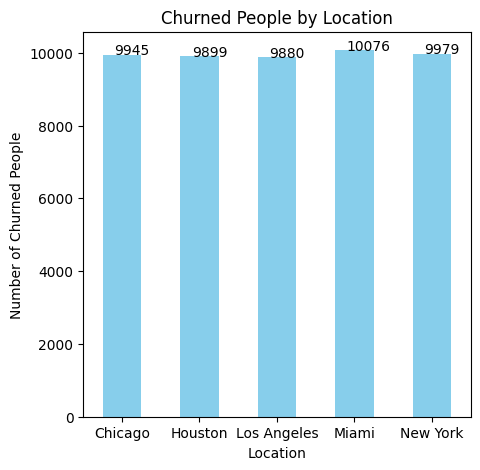

In [16]:
plt.figure(figsize=(5, 5))

churn_by_location = df[df['Churn'] == 1].groupby("Location")["Churn"].count()
bars = churn_by_location.plot(kind='bar', color='skyblue')

plt.title('Churned People by Location')
plt.xlabel('Location')
plt.ylabel('Number of Churned People')
plt.xticks(rotation=0)


for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, str(int(bar.get_height())), fontsize=10, color='black')

plt.show()

In [17]:
gender_usage_avg = df.groupby('Gender')['Total_Usage_GB'].mean()

highest_usage_gender = gender_usage_avg.idxmax()
highest_usage_value = gender_usage_avg.max()

print(f"The gender with the highest average Total_Usage_GB is {highest_usage_gender} with an average of {highest_usage_value} GB.")

The gender with the highest average Total_Usage_GB is Female with an average of 274.57362195316233 GB.


**So woman are has the higest average of total usage of gb**

In [18]:
gender_subscription_avg = df.groupby('Gender')['Subscription_Length_Months'].mean()

# Determine which gender has the higher average Subscription_Length_Months
higher_subscription_gender = gender_subscription_avg.idxmax()
higher_subscription_value = gender_subscription_avg.max()

print(f"The gender with the higher average Subscription_Length_Months is {higher_subscription_gender} with an average of {higher_subscription_value} months.")

The gender with the higher average Subscription_Length_Months is Male with an average of 12.492326852000643 months.


**Male has a higher Subscription_Length_Months**

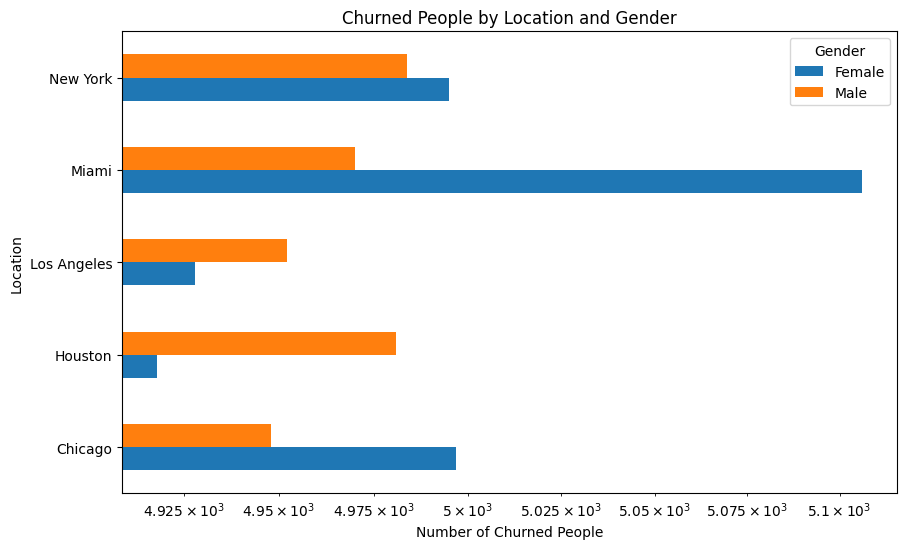

In [19]:
churned_df = df[df['Churn'] == 1]

# Group by 'Location' and 'Gender' and count the number of churned people for each group
location_gender_churn = churned_df.groupby(['Location', 'Gender']).size().unstack(fill_value=0)

# Increase the figure size and create a horizontal bar plot with a logarithmic scale for the y-axis
fig, ax = plt.subplots(figsize=(10, 6))
location_gender_churn.plot(kind='barh', stacked=False, ax=ax)
plt.ylabel('Location')
plt.xlabel('Number of Churned People')
plt.title('Churned People by Location and Gender')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

# Set the x-axis to use a logarithmic scale
ax.set_xscale('log')

plt.show()

# Checking for outliers

In [20]:
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0


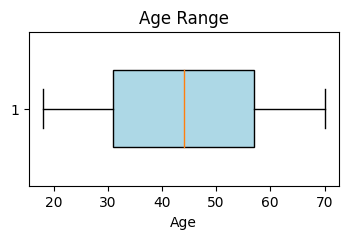

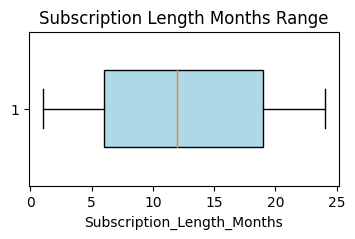

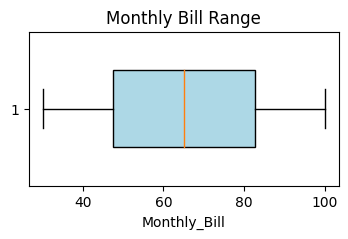

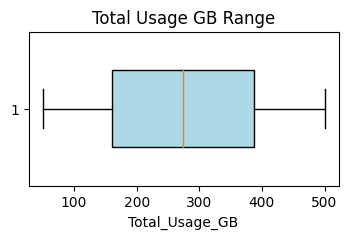

In [21]:
plt.figure(figsize=(4, 2))
plt.boxplot(df['Age'], vert=False, widths=0.5, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.xlabel('Age')
plt.title('Age Range')
plt.show()

plt.figure(figsize=(4, 2))
plt.boxplot(df['Subscription_Length_Months'], vert=False, widths=0.5, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.xlabel('Subscription_Length_Months')
plt.title('Subscription Length Months Range')
plt.show()

plt.figure(figsize=(4, 2))
plt.boxplot(df['Monthly_Bill'], vert=False, widths=0.5, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.xlabel('Monthly_Bill')
plt.title('Monthly Bill Range')
plt.show()

plt.figure(figsize=(4, 2))
plt.boxplot(df['Total_Usage_GB'], vert=False, widths=0.5, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.xlabel('Total_Usage_GB')
plt.title('Total Usage GB Range')
plt.show()


Most of the values are found in range like the higest age is around 70 or the higest uses is 500gb. So most likely there are no outliers or any kind values exist in the dataset

# Encoding categorical variables

In [22]:
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0


In [23]:
label_encoder = LabelEncoder()

In [24]:
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping for 'Gender' Column:")
for category, label in label_mapping.items():
    print(f"{category}: {label}")

Label Mapping for 'Gender' Column:
Female: 0
Male: 1


In [25]:
df['Location_encoded'] = label_encoder.fit_transform(df['Location'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping for 'Gender' Column:")
for category, label in label_mapping.items():
    print(f"{category}: {label}")

Label Mapping for 'Gender' Column:
Chicago: 0
Houston: 1
Los Angeles: 2
Miami: 3
New York: 4


In [26]:
df['Location'] = df['Location_encoded'] 
df['Gender'] = df['Gender_encoded']

In [27]:
df.drop(
    ['Location_encoded', 'Gender_encoded',],
    axis = 1, 
    inplace = True
)

In [28]:
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0


# Feature Engineering

**Trying to find result based on age_group as well**

In [72]:
bins = [0, 30, 60, float('inf')]
labels = ['Young', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [73]:
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group
0,63,1,2,17,73.36,236,0,Senior
1,62,0,4,1,48.76,172,0,Senior
2,24,0,2,5,85.47,460,0,Young


**Encoding age group column**

In [74]:
df['Age_Group_encoded'] = label_encoder.fit_transform(df['Age_Group'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping for 'Gender' Column:")
for category, label in label_mapping.items():
    print(f"{category}: {label}")

Label Mapping for 'Gender' Column:
Middle-Aged: 0
Senior: 1
Young: 2


In [75]:
df['Age_Group'] = df['Age_Group_encoded'] 
df.drop(
    ['Age_Group_encoded'],
    axis = 1, 
    inplace = True
)

In [76]:
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group
0,63,1,2,17,73.36,236,0,1
1,62,0,4,1,48.76,172,0,1
2,24,0,2,5,85.47,460,0,2


#### Getting the total cost

**Based on the length of the subscription length months labeling short term and long term user. thershold is 12 month**

In [77]:
# short term = 0 ; and long term = 1; 
threshold = 12
df['Subscription_Type'] = df['Subscription_Length_Months'].apply(lambda x: 0 if x <= threshold else 1)

In [78]:
df['Total_Cost'] = df['Monthly_Bill'] * df['Subscription_Length_Months']

In [79]:
df['Cost_per_GB'] = df['Monthly_Bill'] / df['Total_Usage_GB'] 

In [80]:
df.head(3)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Age_Group,Subscription_Type,Total_Cost,Cost_per_GB
0,63,1,2,17,73.36,236,0,1,1,1247.12,0.310847
1,62,0,4,1,48.76,172,0,1,0,48.76,0.283488
2,24,0,2,5,85.47,460,0,2,0,427.35,0.185804


# Train, Test and validation  split 

In [81]:
X = df.drop('Churn', axis=1) 
y = df['Churn'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building:

### ML models 

In [30]:
# Define a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [31]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

In [32]:
# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1-Score:", metrics["F1-Score"])
    print("\n")

Model: Logistic Regression
Accuracy: 0.4971
Precision: 0.4913148218587549
Recall: 0.3905856264489467
F1-Score: 0.43519766397124887


Model: Random Forest
Accuracy: 0.5002
Precision: 0.49602964531498145
Recall: 0.4722306219131136
F1-Score: 0.4838376536197459


Model: SVM
Accuracy: 0.5045
Precision: 0.5022439820481436
Recall: 0.12408023384739442
F1-Score: 0.19899773682508892


Model: Decision Tree
Accuracy: 0.50225
Precision: 0.49829454253611555
Recall: 0.5006551758895272
F1-Score: 0.4994720699884358




### Ensemble Model 

checking if there is any kind of improvement using the ML model 

In [33]:
base_classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True)) 
]

In [34]:
ensemble_model = VotingClassifier(estimators=base_classifiers, voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [36]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.49935
Precision: 0.4952567539698907
Recall: 0.48412458421530086
F1-Score: 0.4896274020082573


### Still almost similar result

In [37]:
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  
    eval_metric='logloss',        
    random_state=42               
)

In [38]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [45]:
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [46]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.5033
Precision: 0.49933476614471395
Recall: 0.4917851023082351
F1-Score: 0.4955311801746903


# Perfroming Cross validation 

In [41]:
model = RandomForestClassifier() 

In [42]:
num_folds = 5 
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print("Cross-Validation Accuracy: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Cross-Validation Accuracy: 0.50 +/- 0.00


A cross-validation accuracy of 0.50 +/- 0.00 means that, on average, my machine learning model achieved an accuracy of 50% when evaluated across multiple folds of your dataset. The "+/- 0.00" indicates that there was no significant variation in the accuracy scores among the different folds, which suggests a consistent performance.

# Applying SMOTE (Synthetic Minority Over-sampling Technique) 

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
from sklearn.feature_selection import f_classif,SelectKBest 
fs = SelectKBest(score_func=f_classif,k=4)

In [234]:
# Apply feature selection
fs.fit(x_train, y_train)

SelectKBest(k=4)

In [235]:
fs.get_support()

array([ True, False,  True, False,  True, False,  True, False, False,
       False])

In [236]:
selected_feat = x_train.columns[(fs.get_support())]
selected_feat

Index(['Age', 'Location', 'Monthly_Bill', 'Age_Group'], dtype='object')

In [237]:
x_train = x_train[selected_feat]
x_test = x_test[selected_feat]

In [238]:
x_train.head()


,Age,Location,Monthly_Bill,Age_Group
76513,25,2,98.13,2
60406,54,1,71.90,0
27322,32,0,65.65,0
53699,61,1,83.20,1
65412,70,4,41.93,1


In [239]:
y_train.head()

76513    1
60406    1
27322    1
53699    1
65412    0
Name: Churn, dtype: int64

## Train the model 

In [240]:
from imblearn.combine import SMOTEENN

In [241]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train,y_train)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [242]:
def train_model_Smoteenn(m,name):
    xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
    model_dt_smote = m
    model_dt_smote.fit(xr_train,yr_train)
    yr_predict = model_dt_smote.predict(xr_test)
    model_score_r = model_dt_smote.score(xr_test, yr_test)
    print(name)
    print(classification_report(yr_test, yr_predict))

In [243]:
train_model_Smoteenn(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model_Smoteenn(RandomForestClassifier(random_state=3),"Random Forest Classifier")   
train_model_Smoteenn(XGBClassifier(n_estimators=600),"XGBoost Classifier")   
train_model_Smoteenn(GradientBoostingClassifier(random_state=1),"Gradient Classifier")   
train_model_Smoteenn(ExtraTreesClassifier(),"Extra Trees Classifier")   
train_model_Smoteenn(LogisticRegression(),"Logistic Regression")
train_model_Smoteenn(SVC(), "Support Vector Machine")
train_model_Smoteenn(AdaBoostClassifier(), "AdaBoost Classifier")
train_model_Smoteenn(KNeighborsClassifier(), "K-Nearest Neighbors")
train_model_Smoteenn(CatBoostClassifier(iterations=500, verbose=0), "CatBoost Classifier")

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       896
           1       0.83      0.82      0.83       894

    accuracy                           0.83      1790
   macro avg       0.83      0.83      0.83      1790
weighted avg       0.83      0.83      0.83      1790

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       888
           1       0.92      0.89      0.91       902

    accuracy                           0.91      1790
   macro avg       0.91      0.91      0.91      1790
weighted avg       0.91      0.91      0.91      1790

XGBoost Classifier
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       887
           1       0.82      0.77      0.79       903

    accuracy                           0.80      1790
   macro avg       0.80      0.80      0.80      1790
weigh

# Model Deployment

In [246]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote = ExtraTreesClassifier()
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       923
           1       0.93      0.93      0.93       867

    accuracy                           0.93      1790
   macro avg       0.93      0.93      0.93      1790
weighted avg       0.93      0.93      0.93      1790



## **We are going to select Extra tree as we got 93% accuracy from the model** 


In [250]:
import pickle

filename = 'model.pkl'
pickle.dump(model_dt_smote, open(filename, 'wb'))

In [251]:
load_model = pickle.load(open(filename, 'rb'))

model_score_r = load_model.score(xr_test, yr_test)

print('Extra Trees Classifier')
print(classification_report(yr_test, yr_predict))

Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       923
           1       0.93      0.93      0.93       867

    accuracy                           0.93      1790
   macro avg       0.93      0.93      0.93      1790
weighted avg       0.93      0.93      0.93      1790



In [252]:
print(confusion_matrix(yr_test, yr_predict))

[[861  62]
 [ 61 806]]


# Checking Model with random Data and custom input

In [282]:
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [283]:
from prettytable import PrettyTable

In [284]:
results = []

num_tests = 50

column_names = ["Age", "Location", "Monthly_Bill", "Age_Group"]

In [ ]:
for _ in range(num_tests):
    random_data = {
        "Age": random.randint(18, 80),
        "Location": random.randint(0, 5),
        "Monthly_Bill": round(random.uniform(20, 200), 2),
        "Age_Group": random.choice([0, 1, 2])
    }

    input_data = [random_data[col] for col in column_names]
    prediction = model.predict([input_data])
    results.append([input_data, prediction[0]])

In [286]:
table = PrettyTable()
table.field_names = ["Column Names"] + column_names + ["Churn Prediction"]


for result in results:
    table.add_row(["Random Data"] + result[0] + [result[1]])


print(table)

+--------------+-----+----------+--------------+-----------+------------------+
| Column Names | Age | Location | Monthly_Bill | Age_Group | Churn Prediction |
+--------------+-----+----------+--------------+-----------+------------------+
| Random Data  |  22 |    3     |    167.42    |     1     |        1         |
| Random Data  |  79 |    2     |     80.0     |     1     |        0         |
| Random Data  |  46 |    1     |    186.27    |     2     |        1         |
| Random Data  |  30 |    0     |    68.08     |     2     |        0         |
| Random Data  |  38 |    4     |    158.82    |     1     |        1         |
| Random Data  |  56 |    0     |    172.21    |     0     |        0         |
| Random Data  |  54 |    3     |     22.0     |     2     |        0         |
| Random Data  |  24 |    4     |     66.7     |     1     |        0         |
| Random Data  |  55 |    5     |    40.11     |     1     |        0         |
| Random Data  |  35 |    4     |     24